# pytorch NN sign language digits recognition: 


---
<br>

### Created by:
Guy Houri and Yoav Gal
<br>


## Sign Language Digits With PyTorch
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#  MUST HAVE DOWNLOADS!

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq # The data set
!gdown 1yAEQTqJl-ZbTUr1PNMTOlYMPY0RTAHsp # Our best model
!gdown 1GTkifSLRVnBcvlYDtppIXHhsHLwrYXYG # Explanier.md
!gdown 1MMPvXVGVeKSfWMTOzB4iqy7fIXtEg8qx # emaples.zip
!unzip -o /content/examples.zip
%load_ext autotime

time: 23.1 s (started: 2025-01-24 07:10:41 +00:00)


# Neural Network with PyTorch part 1 (Binary Classification)

## Import Libraries and load data

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

time: 5.52 s (started: 2025-01-24 07:11:04 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 182 ms (started: 2025-01-24 07:11:10 +00:00)


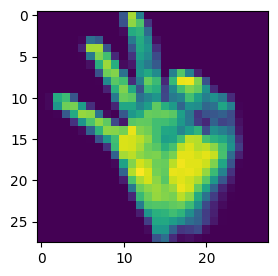

time: 403 ms (started: 2025-01-24 07:11:10 +00:00)


In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(X[4500].reshape(28,28))
plt.show()

## Data preprocessing


### Select two classes

In [ ]:
mask = (y == "0") | (y == "5")
X_filtered = X[mask]
Y_filtered = y[mask]

print(f'Y_filtered: {Y_filtered.shape} \n X_filtered: {X_filtered.shape} \n Y_filtered: {Y_filtered[498:502]}')

Y_filtered: (1000,) 
 X_filtered: (1000, 784) 
 Y_filtered: ['0' '0' '5' '5']
time: 9.42 ms (started: 2025-01-24 07:11:10 +00:00)


### Feature scaling

In [ ]:
scaled_x = X_filtered/255.0
scaled_y = (Y_filtered == "5").astype(int)


print(scaled_x[500][0:28]);
print(scaled_y[499:501]);

[0.         0.         0.         0.         0.         0.
 0.         0.         0.34509804 0.55686275 0.09019608 0.
 0.         0.         0.4        0.43529412 0.01568627 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0 1]
time: 6.21 ms (started: 2025-01-24 07:11:10 +00:00)


### Create The Datasets

In [ ]:
from torch.utils.data import Dataset, random_split

class SignDigitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X , dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataset = SignDigitDataset(scaled_x, scaled_y)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size


train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f'Train size: {len(train_dataset)} \nTest size: {len(test_dataset)}')

Train size: 800 
Test size: 200
time: 16.8 ms (started: 2025-01-24 07:11:10 +00:00)


Use Pytorch data tools to preprocessed the row data<br>
Read about pytorch data tools here: https://pytorch.org/docs/stable/data.html

In [ ]:
from torch.utils.data import DataLoader, RandomSampler

train_loader = DataLoader(train_dataset, batch_size=32, sampler=RandomSampler(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=32)


time: 1.17 ms (started: 2025-01-24 07:11:11 +00:00)


## Build the network



**Architecture:**

- Input layer: 784 neurons (for the flattened 28x28 image)
- Hidden layer 1: 128 neurons, ReLU activation
- Hidden layer 2: 64 neurons, ReLU activation
- Output layer: 1 neuron, Sigmoid activation


In [ ]:
from torch import nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
  def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

  def forward(self, x):
      x = x.view(-1, 784)
      x = self.relu1(self.fc1(x))
      x = self.relu2(self.fc2(x))
      x = self.sigmoid(self.fc3(x))
      return x

time: 3.82 ms (started: 2025-01-24 07:11:11 +00:00)


Move the modal to the GPU if avilabe.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)

time: 6.59 ms (started: 2025-01-24 07:11:11 +00:00)


### Build the Optimizer
Read about the Optimizer here: https://pytorch.org/docs/stable/optim.html


In [ ]:
from torch import optim
optimizer =  optim.Adam(model.parameters())

time: 768 µs (started: 2025-01-24 07:11:11 +00:00)


### Loss Function
Read about Loss here: https://pytorch.org/docs/stable/optim.html

In [ ]:
loss_fn = nn.BCELoss()

time: 571 µs (started: 2025-01-24 07:11:11 +00:00)


## Training


In [ ]:
epochs = 10
eval_losses = []
eval_accu = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # Move data to the device

        optimizer.zero_grad()  # Clear gradients from the previous iteration
        output = model(data)  # Forward pass
        batch_loss = loss_fn(output , target.unsqueeze(1).float())  # Calculate loss
        batch_loss.backward()  # Backward pass (calculate gradients)
        optimizer.step()  # Update model weights

        epoch_loss += batch_loss.item()

        # Calculate accuracy
        predicted = torch.round(output)
        total_samples += target.size(0)
        correct_predictions += (predicted == target.unsqueeze(1)).sum().item()

    epoch_loss /= len(train_loader)
    epoch_accuracy = correct_predictions / total_samples
    eval_losses.append(epoch_loss)
    eval_accu.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch [1/10], Loss: 0.4707, Accuracy: 0.8800
Epoch [2/10], Loss: 0.0530, Accuracy: 0.9962
Epoch [3/10], Loss: 0.0086, Accuracy: 0.9975
Epoch [4/10], Loss: 0.0020, Accuracy: 1.0000
Epoch [5/10], Loss: 0.0011, Accuracy: 1.0000
Epoch [6/10], Loss: 0.0008, Accuracy: 1.0000
Epoch [7/10], Loss: 0.0006, Accuracy: 1.0000
Epoch [8/10], Loss: 0.0004, Accuracy: 1.0000
Epoch [9/10], Loss: 0.0003, Accuracy: 1.0000
Epoch [10/10], Loss: 0.0003, Accuracy: 1.0000
time: 2.69 s (started: 2025-01-24 07:11:11 +00:00)


### Loss and Accuracy Visualization
Show  on plot the lose during training

Text(0, 0.5, 'Loss')

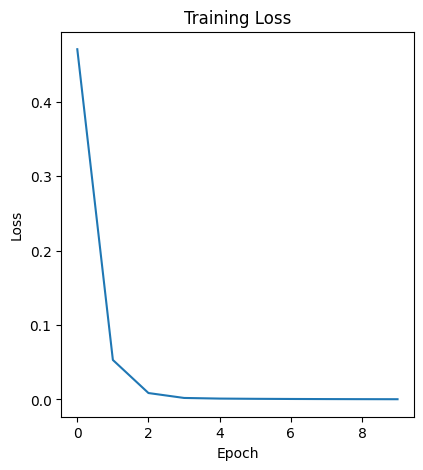

time: 346 ms (started: 2025-01-24 07:11:13 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(eval_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


Show  on plot the accuracy during training

Text(0, 0.5, 'Accuracy')

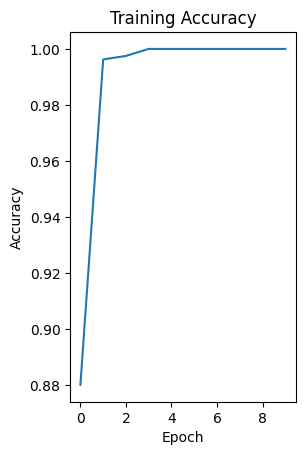

time: 673 ms (started: 2025-01-24 07:11:14 +00:00)


In [ ]:
plt.subplot(1, 2, 2)
plt.plot(eval_accu)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#### Training results:
We can see that the loss is converging to 0 and the accurcy is converging to 1.

Both are good signs!

## Testing and Evaluating


In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        predicted = torch.round(output)

        y_true.extend(target.cpu().numpy())  # Move target to CPU and convert to NumPy
        y_pred.extend(predicted.cpu().numpy().squeeze())  # Move predicted to CPU, convert to NumPy, and squeeze

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000
time: 68.9 ms (started: 2025-01-24 07:11:14 +00:00)


### Model Evaluation

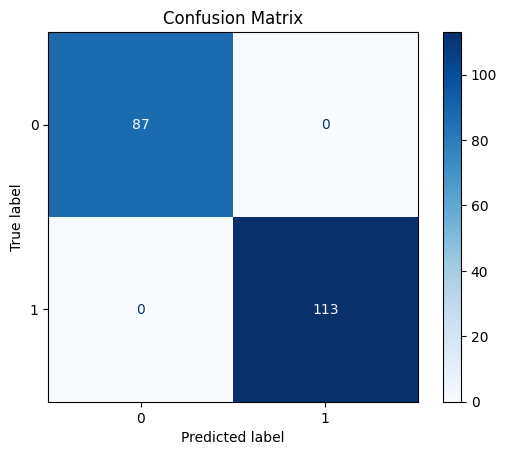

time: 560 ms (started: 2025-01-24 07:11:14 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools


cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

# Plot Confusion Matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


#### Testing and evaluating results
Looks like our model did super well!

---
<br>


# Neural Network with PyTorch part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

time: 683 µs (started: 2025-01-24 07:11:15 +00:00)


## Data preprocessing


In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 236 ms (started: 2025-01-24 07:11:15 +00:00)


### Create normalized datasets and loaders

In this code section we would:

1. Create a data set from the data and normalize the data in that set.
2. Split the data to train test and validation sets.
3. Create datat loaders for those data sets.

In [ ]:
from torch.utils.data import Dataset, random_split, DataLoader, RandomSampler


class SignDigitDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x / 255, dtype=torch.float32)  # Normalize x
        self.y = torch.tensor(y.astype(int), dtype=torch.long)  # Convert y to integers

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


dataset = SignDigitDataset(X, y)

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f'Train size: {len(train_dataset)} \nValidation size: {len(val_dataset)} \nTest size: {len(test_dataset)}')

train_loader = DataLoader(train_dataset, batch_size=32, sampler=RandomSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

Train size: 4000 
Validation size: 500 
Test size: 500
time: 39.3 ms (started: 2025-01-24 07:11:15 +00:00)


## Models

### Base Model


* **Architecture:**
    - Input layer: 784 neurons (for the flattened 28x28 image)
    - Hidden layer 1: 128 neurons, ReLU activation
    - Hidden layer 2: 64 neurons, ReLU activation
    - Output layer: 10 neurons (for the 10 classes), Softmax activation
* **Loss function:** `nn.CrossEntropyLoss()` (suitable for multi-class classification)
* **Optimizer:** `optim.Adam()` with a default learning rate (you can adjust this later)
* **Epochs:** `10`
* **Batch size:** `32` (a common starting point)

**Rationale:**

* This is a simple feedforward neural network with a few hidden layers. It's a good starting point to establish a baseline performance.
* ReLU is a commonly used as non linear activation function that generally works well.
* Softmax is used in the output layer to produce probabilities for each class.
* `CrossEntropyLoss` is the standard loss function for multi-class classification.
* Adam is a popular optimizer that often performs well.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


base_model = BaseModel()

base_optimizer = optim.Adam(base_model.parameters())

base_loss_function = nn.CrossEntropyLoss()

time: 10.2 ms (started: 2025-01-24 07:11:15 +00:00)


### Experiment number 1

**Changes compared to the Base Model:** <Br>
Added a third fully connected layer (`self.fc3`) with 32 neurons.

**Rational:** <br>
Deeper networks have the potential to learn more complex representations of the input data. Each layer can learn increasingly abstract features from the previous layer's output. In our case, by adding a third hidden layer with 32 neurons, we aim to investigate whether this increased depth allows the model to capture finer details in the hand gesture images, potentially leading to improved classification accuracy.

**Potential Downside:** <br>
Adding more layers also increases the number of parameters in the model, which can lead to overfitting, especially with limited data. However, as per the instructions, we are not addressing overfitting directly in these experiments (no regularization, dropout etc). We are simply observing the effects of the architectural change.




In [ ]:
class Experiment1Model(nn.Module):
    def __init__(self):
        super(Experiment1Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)  # Added another hidden layer
        self.relu3 = nn.ELU()
        self.fc4 = nn.Linear(32, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x


exp1_model = Experiment1Model()

exp1_optimizer = optim.Adam(exp1_model.parameters())

exp1_loss_function = base_loss_function

time: 11.7 ms (started: 2025-01-24 07:11:15 +00:00)


### Experiment number 2

**Changes compared to the Base Model:** <br>
Learning Rate 0.001 -> 0.01. <br>
**Rational:** <br>
Increasing the learning rate means the optimizer will take larger steps. This could potentially speed up the training process and help the model converge faster. If the original learning rate was too small, the model might have been stuck in a shallow local minimum. A larger learning rate could help it escape this minimum and find a better solution.<br>
**Potential downsides** <br>
A learning rate of 0.01 might be too large, causing the optimization to become unstable. The model's loss could start to fluctuate significantly or even diverge, preventing it from learning effectively. Therefore, it's essential to compare the results with the original learning rate to see if the change is beneficial.


In [ ]:
class Experiment2Model(nn.Module):
    def __init__(self):
        super(Experiment2Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


exp2_model = Experiment2Model()


exp2_optimizer = optim.Adam(exp2_model.parameters(), lr=0.01)


exp2_loss_function = nn.CrossEntropyLoss()

time: 21 ms (started: 2025-01-24 07:11:15 +00:00)



## Train test and compare the models!

The following is a generic train function we will use to train all of our
models.

**note** that this function includes accuracy and loss charts  

In [ ]:
def calculate_accuracy(output, target):
    _, predicted = torch.max(output.data, 1)
    total_samples = target.size(0)
    correct_predictions = (predicted == target).sum().item()
    return correct_predictions / total_samples

time: 732 µs (started: 2025-01-24 07:11:16 +00:00)


In [ ]:
def train_epoch(model, optimizer, loss_fun, data_loader, device):
    model.train()
    epoch_loss = 0
    epoch_accuracy = 0

    for batch_idx, (data, target) in enumerate(data_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = loss_fun(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_accuracy += calculate_accuracy(output, target)

    return epoch_loss / len(data_loader), epoch_accuracy / len(data_loader)


time: 1.11 ms (started: 2025-01-24 07:11:16 +00:00)


In [ ]:
def validate_epoch(model, loss_fun, data_loader, device):
    model.eval()
    epoch_loss = 0
    epoch_accuracy = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fun(output, target)
            epoch_loss += loss.item()
            epoch_accuracy += calculate_accuracy(output, target)

    return epoch_loss / len(data_loader), epoch_accuracy / len(data_loader)

time: 3.12 ms (started: 2025-01-24 07:11:16 +00:00)


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, data_loader, device):
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    print(classification_report(y_true, y_pred))

time: 1.14 ms (started: 2025-01-24 07:11:16 +00:00)


In [ ]:
from sklearn.metrics import classification_report

def train_model(model, optimizer, loss_fun, epochs, model_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model.to(device)

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, optimizer, loss_fun, train_loader, device)
        val_loss, val_acc = validate_epoch(model, loss_fun, val_loader, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train')
    plt.plot(val_accuracies, label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    generate_classification_report(model, test_loader, device);

time: 2.79 ms (started: 2025-01-24 07:11:16 +00:00)


#### Base model - train

Using device: cpu
Epoch [1/10], Train Loss: 2.0742, Train Accuracy: 0.4375, Val Loss: 1.8031, Val Accuracy: 0.7789
Epoch [2/10], Train Loss: 1.6923, Train Accuracy: 0.8353, Val Loss: 1.6250, Val Accuracy: 0.8859
Epoch [3/10], Train Loss: 1.5838, Train Accuracy: 0.9183, Val Loss: 1.5640, Val Accuracy: 0.9324
Epoch [4/10], Train Loss: 1.5500, Train Accuracy: 0.9377, Val Loss: 1.5346, Val Accuracy: 0.9531
Epoch [5/10], Train Loss: 1.5205, Train Accuracy: 0.9605, Val Loss: 1.5296, Val Accuracy: 0.9512
Epoch [6/10], Train Loss: 1.5048, Train Accuracy: 0.9735, Val Loss: 1.5148, Val Accuracy: 0.9590
Epoch [7/10], Train Loss: 1.4960, Train Accuracy: 0.9768, Val Loss: 1.5007, Val Accuracy: 0.9746
Epoch [8/10], Train Loss: 1.4906, Train Accuracy: 0.9805, Val Loss: 1.4972, Val Accuracy: 0.9734
Epoch [9/10], Train Loss: 1.4820, Train Accuracy: 0.9875, Val Loss: 1.4977, Val Accuracy: 0.9746
Epoch [10/10], Train Loss: 1.4801, Train Accuracy: 0.9880, Val Loss: 1.4976, Val Accuracy: 0.9727


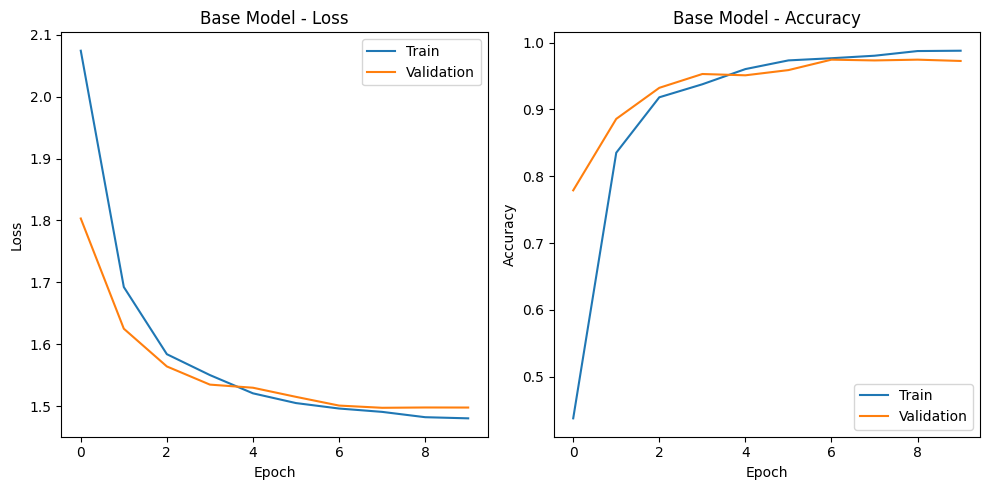

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.96      1.00      0.98        52
           2       1.00      0.98      0.99        58
           3       0.98      0.96      0.97        45
           4       0.96      0.91      0.93        47
           5       1.00      0.96      0.98        49
           6       0.98      0.98      0.98        45
           7       0.88      0.98      0.93        46
           8       0.93      0.96      0.95        45
           9       0.98      0.94      0.96        54

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

time: 13.3 s (started: 2025-01-24 07:11:16 +00:00)


In [ ]:
%%script echo skipping
train_model(base_model, base_optimizer, base_loss_function, 10, "Base Model")

#### Experiment number 1 - train

Using device: cpu
Epoch [1/10], Train Loss: 2.0899, Train Accuracy: 0.4065, Val Loss: 1.8229, Val Accuracy: 0.6867
Epoch [2/10], Train Loss: 1.7252, Train Accuracy: 0.7705, Val Loss: 1.6618, Val Accuracy: 0.8320
Epoch [3/10], Train Loss: 1.6327, Train Accuracy: 0.8488, Val Loss: 1.6109, Val Accuracy: 0.8652
Epoch [4/10], Train Loss: 1.6102, Train Accuracy: 0.8638, Val Loss: 1.6018, Val Accuracy: 0.8691
Epoch [5/10], Train Loss: 1.5935, Train Accuracy: 0.8762, Val Loss: 1.5977, Val Accuracy: 0.8711
Epoch [6/10], Train Loss: 1.5861, Train Accuracy: 0.8805, Val Loss: 1.5869, Val Accuracy: 0.8789
Epoch [7/10], Train Loss: 1.5808, Train Accuracy: 0.8860, Val Loss: 1.5918, Val Accuracy: 0.8758
Epoch [8/10], Train Loss: 1.5784, Train Accuracy: 0.8862, Val Loss: 1.5810, Val Accuracy: 0.8828
Epoch [9/10], Train Loss: 1.5727, Train Accuracy: 0.8898, Val Loss: 1.5788, Val Accuracy: 0.8848
Epoch [10/10], Train Loss: 1.5773, Train Accuracy: 0.8870, Val Loss: 1.5804, Val Accuracy: 0.8828


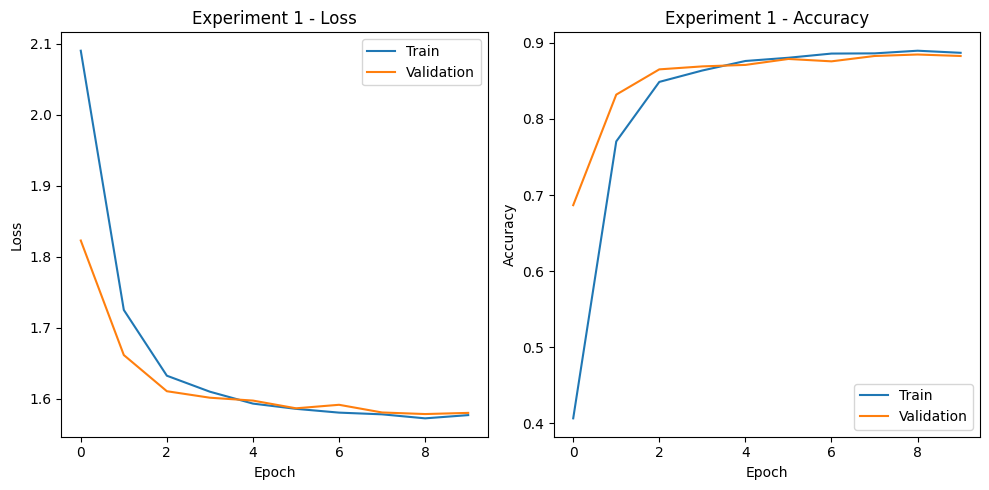

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        52
           2       1.00      0.98      0.99        58
           3       0.98      0.93      0.95        45
           4       0.81      0.98      0.88        47
           5       0.94      0.96      0.95        49
           6       1.00      0.91      0.95        45
           7       0.61      0.98      0.75        46
           8       0.00      0.00      0.00        45
           9       0.81      1.00      0.89        54

    accuracy                           0.89       500
   macro avg       0.81      0.87      0.84       500
weighted avg       0.83      0.89      0.85       500

time: 13.7 s (started: 2025-01-24 07:11:29 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
%%script echo skipping
train_model(exp1_model, exp1_optimizer, exp1_loss_function, 10, "Experiment 1")

#### Experiment number 2 - train

Using device: cpu
Epoch [1/10], Train Loss: 1.9715, Train Accuracy: 0.4873, Val Loss: 1.8943, Val Accuracy: 0.5629
Epoch [2/10], Train Loss: 1.8197, Train Accuracy: 0.6405, Val Loss: 1.8258, Val Accuracy: 0.6316
Epoch [3/10], Train Loss: 1.8093, Train Accuracy: 0.6512, Val Loss: 1.7702, Val Accuracy: 0.6887
Epoch [4/10], Train Loss: 1.7788, Train Accuracy: 0.6810, Val Loss: 1.7625, Val Accuracy: 0.6949
Epoch [5/10], Train Loss: 1.7555, Train Accuracy: 0.7035, Val Loss: 1.7084, Val Accuracy: 0.7512
Epoch [6/10], Train Loss: 1.7313, Train Accuracy: 0.7295, Val Loss: 1.7881, Val Accuracy: 0.6684
Epoch [7/10], Train Loss: 1.7502, Train Accuracy: 0.7100, Val Loss: 1.7729, Val Accuracy: 0.6852
Epoch [8/10], Train Loss: 1.7797, Train Accuracy: 0.6807, Val Loss: 1.8255, Val Accuracy: 0.6363
Epoch [9/10], Train Loss: 1.7321, Train Accuracy: 0.7278, Val Loss: 1.7754, Val Accuracy: 0.6863
Epoch [10/10], Train Loss: 1.7217, Train Accuracy: 0.7398, Val Loss: 1.7652, Val Accuracy: 0.6957


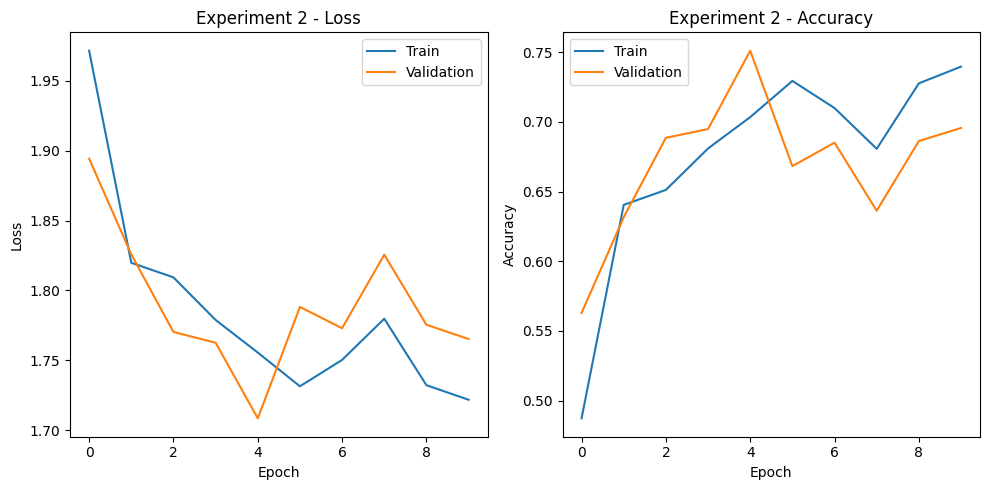

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       0.83      1.00      0.90        52
           2       0.92      0.78      0.84        58
           3       0.93      0.89      0.91        45
           4       0.52      0.68      0.59        47
           5       0.88      0.94      0.91        49
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        46
           8       0.35      0.98      0.52        45
           9       0.93      0.78      0.85        54

    accuracy                           0.72       500
   macro avg       0.63      0.70      0.65       500
weighted avg       0.66      0.72      0.67       500

time: 8.62 s (started: 2025-01-24 07:11:43 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
%%script echo skipping
train_model(exp2_model, exp2_optimizer, exp2_loss_function, 10, "Experiment 2")

### Save Trained model (your best model)

From the results we got in the previous section, we have decided to stick with the `base model` as our best model do to the highest accuracy

we did't want to give drive premissions downloaded the file and uploaded it manually.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

time: 235 µs (started: 2025-01-24 07:11:51 +00:00)


In [ ]:
torch.save(base_model.state_dict(), "./current-base-model")

time: 4.07 ms (started: 2025-01-24 07:11:51 +00:00)


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.

### Load trained model

Recreate the model class (if you havent ran the the previous code)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


base_model = BaseModel()

base_optimizer = optim.Adam(base_model.parameters())

base_loss_function = nn.CrossEntropyLoss()

time: 4.18 ms (started: 2025-01-24 07:11:51 +00:00)


In [ ]:
model = BaseModel()
model.load_state_dict(torch.load("/content/drive-best-model", weights_only=True))
model.eval()

BaseModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

time: 7.52 ms (started: 2025-01-24 07:11:51 +00:00)


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single npy file of an Sign Language Digit (28x28 image as npy).<br>


Saving 7_example.npy to 7_example (1).npy


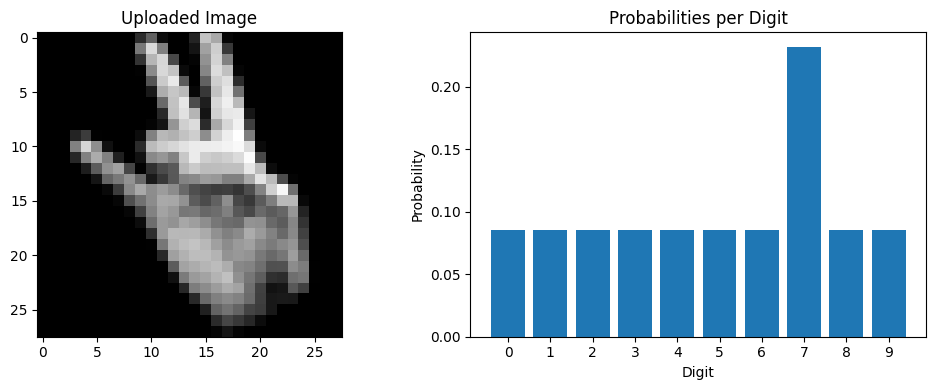

The predicted digit is: 7
time: 15 s (started: 2025-01-24 07:14:39 +00:00)


In [39]:
import torch
import time
import random
from numpy import load as load_npy
from google.colab import files
import matplotlib.pyplot as plt

def predict_sign_digit(model):
    start_time = time.time()

    uploaded = files.upload()
    if uploaded:
        filename = next(iter(uploaded))
        image = load_npy(filename)
    else:
        random_image_number = random.randint(0, 9)
        image = load_npy(f"/content/{random_image_number}_example.npy")
        print(f'an image of {random_image_number} was selected randomly' )

    # Normalize the image
    image = torch.tensor(image / 255, dtype=torch.float32)

    # Make a prediction
    with torch.no_grad():
        output = model(image.unsqueeze(0).unsqueeze(0))
        probabilities = torch.softmax(output, dim=1)
        _, predicted = torch.max(probabilities.data, 1)


    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Uploaded Image")

    # Bar chart of probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), probabilities.squeeze().numpy())
    plt.xticks(range(10))
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.title("Probabilities per Digit")

    plt.tight_layout()
    plt.show()

    return predicted.item()

predicted_digit = predict_sign_digit(model)


print(f"The predicted digit is: {predicted_digit}")